In [1]:
import random

from itertools import cycle

import src.network_components as nc
import src.loss_functions as lf
import src.activation_functions as af

## Run Neural Network

#### Define test data

In [2]:
xs = [[random.randint(0, 9) for _ in range(3)] for _ in range(500)]
ys = [[4 * x[0] + x[1] + x[2]] for x in xs]

In [3]:
in_cycle = cycle(xs)
target_cycle = cycle(ys)

#### Run epochs

In [39]:
LEARNING_RATE = 0.0001
num_epochs = 500
weights, biases = nc.init_NN(3, 3, 3, 1)
losses = []
activation = af.relu
loss_fn = lf.MSE
for i in range(num_epochs):
    x = next(in_cycle)
    target = next(target_cycle)
    _out = nc.forward(x, weights, biases,activation)
    loss = loss_fn(_out[-1], target)
    losses.append(loss)
    weights, biases = nc.backprop(weights, biases, _out, target, loss_fn, LEARNING_RATE, activation)
    if i % (num_epochs // 10) == 0:
        print(f"Epoch {i}: {loss}")
    if loss < 1e-10:
        break

Epoch 0: 185.75824792547118
Epoch 50: 0.00421212489085081
Epoch 100: 38.80909060207886
Epoch 150: 27.816719833093835
Epoch 200: 2.1438545084931184
Epoch 250: 0.11044993217090154
Epoch 300: 6.548375454976393
Epoch 350: 3.433334101799208
Epoch 400: 0.002914405679808359
Epoch 450: 0.49933256454311153


In [40]:
import matplotlib.pyplot as plt

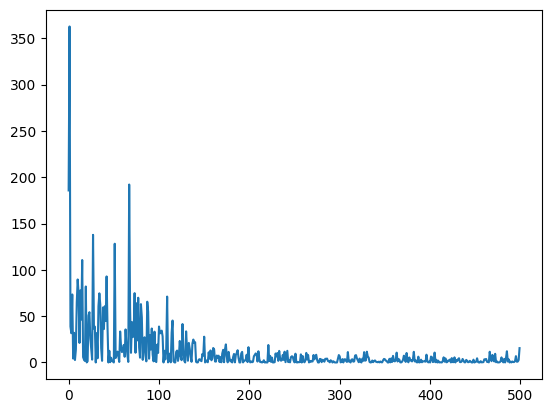

In [41]:
plt.plot(range(len(losses)), losses)